Para entregar:
Ejercicio 2 completo, 3 completo y 4 (opcional)
Ejercicio 3: entregar tambien el diagrama del modelo, ej 3.1.

No hay que quedarse con un unico mensaje, nuestro sistema debe poder recibirlos todos, porque desconocemos el mensaje real.

Ejemplo Apuestas de Kelly.

Tengo que apostar todo en dos opciones, o pasa una u otra (cara/ceca, river/boke). Puedo apostar por ambos.
Cara paga x3, ceca x1.2 Cual es la proporcion optima para distribuir mis apuestas?

# Ejercicio 2

In [1]:
from collections import Counter
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm

## 2.1 Calcular la esperanza de los recursos en los primeros dos pasos temporales.

Usamos b=0.5 y calculamos esperanza en 10 juegos.

In [2]:
GANANCIA_CARA = 3
GANANCIA_CECA = 1.2

In [32]:
# Wealth para 1 paso
def w_bd(w0: float, b: float, d: int) -> float:
    """Wealth obtenido en funcion de w0, el wealth inicial; b, proporcion apostada 
    a cara (0,1); y d, el dato de si es cara (d=1) o ceca (d=0)"""
    if d == 1:
        return w0 * b * GANANCIA_CARA
    else:
        return w0 * (1 - b) * GANANCIA_CECA
    

def w_eventos(w0, b, eventos) -> float:
    """Wealth dada una lista de eventos, ej: [ 0, 1, 1, 0 ,0 ,1]"""
    contador = Counter(eventos)
    return w0 * (b * GANANCIA_CARA)** contador[1] * ((1-b) * GANANCIA_CECA) ** contador[0]


# Posibles resultados dado N eventos
def posibles_resultados(N: int) -> list[list[int]]:
    """Devuelve lista de listas con los posibles resultados dado N eventos.
    Ejemplo: N = 2 => [[0, 0], [0, 1], [1, 0], [1, 1]]"""
    posibilidades = [[0],[1]]
    resultados :list[list[int]] = posibilidades.copy()
    for i in range(N-1):
        resultados = [k+j for k in resultados for j in posibilidades]
    return resultados

def probabilidad_dato(dato: list[int]) -> float:
    '''Devuelve Probabilidad de un listado de eventos, que como cada evento\
        tiene 2 posibilidades equiprobables, termina siendo 0.5 ** N para \
        N eventos.'''
    return 0.5**(len(dato))

def esperanza(w0: float, b: float, N: int) -> float:
    """Dado un wealth inicial, una proporcion de apuestas para Cara y\
        la cantidad de eventos a simular, devuelve la esperanza de la\
        wealth."""
    posibilidades = posibles_resultados(N)
    sum = 0
    for eventos in posibilidades:
        sum += w_eventos(w0,b,eventos) * probabilidad_dato(eventos)
    return sum




In [5]:
esperanzas = []
for i in range(3):
    esperanzas.append(esperanza(1,0.5,i+1))
esperanzas

[1.05, 1.1025, 1.157625]

In [6]:
esperanzas[1]/esperanzas[0],esperanzas[2]/esperanzas[1]

(1.05, 1.0499999999999998)

La tasa de crecimiento entre paso y paso es 1.05
Es decir, la esperanza al paso T es 1.05**T

## 2.2 Simular 10000 personas, y graficar el promedio de sus recursos en los primeros 10 pasos temporales.

In [8]:
def simular_jugada(N_eventos):
    resultados = []
    for i in range(N_eventos):
        resultados.append(rd.choice([0,1]))
    return resultados

def simular_jugadas(N_jugadores,N_eventos):
    return [simular_jugada(N_eventos) for i in range(N_jugadores)]

In [21]:
jugadas = simular_jugadas(10000,10)
plata_ronda_10 = [w_eventos(1,0.5,eventos) for eventos in jugadas]
sum(plata_ronda_10)/len(plata_ronda_10)

1.6103446216810098

In [22]:
1.05 ** 10

1.628894626777442

Se acerca al planteo anterior, perfecto.

## 2.3 Distribuir tu creencia entre conviene o no conviene participar de esta apuesta (el tiempo que quieras).

In [6]:
esperanza(1,1,20)

3325.256730079651

Si hago all in a cara, la esperanza me dice que me hago millonario. Por las dudas meto un 0.8 como para no hacerme el loco.

## 2.4 Elegir una apuesta y graficar c´omo se actualizan los recursos en el tiempo.

Elijo b=0.8
Pocas personas, muchos pasos

C:\Users\admin\AppData\Local\Temp\ipykernel_46400\3399267798.py:15: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(apostadores).T)


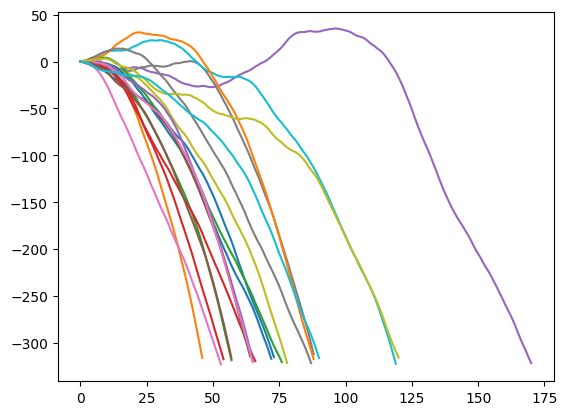

In [23]:
apuesta = 0.8
apostadores = []
tiradas = 1000
N_apostadores = 20
for i in range(N_apostadores):
    apostador = [1]
    eventos = []
    for j in range(tiradas):
        eventos.append(rd.choice([0,1]))
        apostador.append(w_eventos(apostador[j],apuesta,eventos))
    apostadores.append(apostador.copy())
    # print(apostador)
    # print(eventos)
apostadores = np.array(apostadores)
plt.plot(np.log10(apostadores).T)

    


Probando con mi creencia inicial, eventualmente siempre pierdo :(

## 2.5 Graficar la tasa de crecimiento temporal (l´ımT →∞) de los recursos para cada apuesta alternativa b.

In [24]:
filas, columnas = 4,3
total = filas * columnas
bs = np.linspace(0, 1, total)
data = []
for idx, b in enumerate(bs):
    apuesta = b
    apostadores = []
    tiradas = 100
    N_apostadores = 20
    for i in range(N_apostadores):
        apostador = [1]
        eventos = []
        for j in range(tiradas):
            eventos.append(rd.choice([0,1]))
            apostador.append(w_eventos(apostador[j],apuesta,eventos))
        apostadores.append(apostador.copy())
        # print(apostador)
        # print(eventos)
    apostadores = np.array(apostadores)
    data.append(apostadores)


C:\Users\admin\AppData\Local\Temp\ipykernel_46400\3290239335.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(data[i]).T)


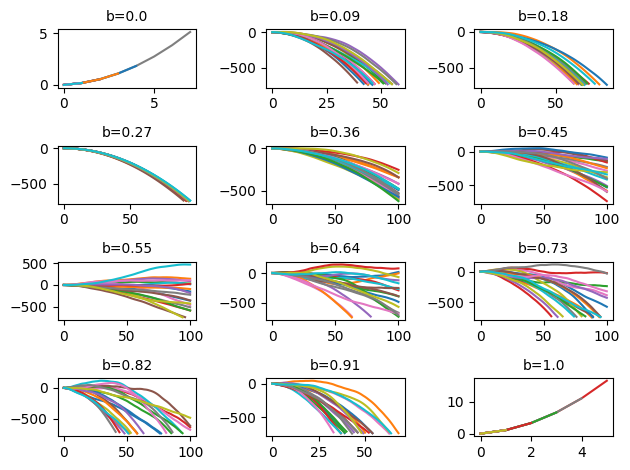

In [25]:
for i in range(len(data)):
    plt.subplot(filas,columnas,i+1)
    plt.plot(np.log(data[i]).T)
    plt.title(label=f"b={round(bs[i],2)}").set_fontsize(10)
    plt.tight_layout()

El b=0 y b=1 crece al principio pero despues se va a cero (los distintos colores son tiradas que arrancan con Cara o Ceca y cambia el color cuando una de ellas saca el valor opuesto, yendose la wealth a 0)

## 2.6. Buscar la apuesta que maximiza los recursos si se modifica el pago que ofrece la casa de apuestas.


Quiero maximizar la ganancia si Qc = 10 y Qc = 1

In [34]:
GANANCIA_CARA = 10
GANANCIA_CECA = 1

bs = np.linspace(0,1,10)[1:]
esperanzas = []
for b in bs:
    print(b)
    esperanzas.append(esperanza(1,b,20))
print(bs)
print(esperanzas)

0.1111111111111111
0.2222222222222222
0.3333333333333333
0.4444444444444444
0.5555555555555556
0.6666666666666666
0.7777777777777777
0.8888888888888888
1.0
[0.11111111 0.22222222 0.33333333 0.44444444 0.55555556 0.66666667
 0.77777778 0.88888889 1.        ]
[np.float64(1.0000000000047367), np.float64(3325.2567300675955), np.float64(1048576.0000001986), np.float64(90949470.1772646), np.float64(3486784400.9994297), np.float64(76095835015.88367), np.float64(1099511627775.8562), np.float64(11594453295761.836), np.float64(95367431640625.0)]


Aprox, si me la juego por Cara, la esperanza es mayor.

## 2.7. Calcular anal´ıticamente la diferencia de desempe˜no de dos apuestas b y d dado unos pagos fijos Qc y Qs.


$$ w_t(b) = r(b)^T $$
$$ w_t(b)^{1/T} = r(b) $$

$$ \lim_{T ->\inf} w_t(b)^{1/T} = \lim_{T ->\inf} w_0 (b * Qc)^{n_c/T} ((1-b) * Qs)^{n_s/T} $$
$n_c/T -> p_c$  y $n_s/T -> (1-p_c)$


Queremos comparar b!!!

BayesFactor, comparo las tasas de crecimiento dependientes de la apuesta que hagas

$$\frac{r(b)}{r(d)} \text{ con } b!=d$$

$$\frac{r(b)}{r(d)} = \frac{\omega_0 (b Q_c)^P ((1-b)Q_s)^{1-P}}{\omega_0 (d Q_c)^P ((1-d)Q_s)^{1-P}} = \frac{(b)^P ((1-b))^{1-P}}{(d)^P ((1-d))^{1-P}}$$

NO DEPENDE DE LO QUE TE OFREZCA LA CASA DE APUESTAS!!!!


## 2.8. Calcular la diferencia de las tasas de crecimiento de dos apuestas b y d a largo plazo (l´ımT→∞) expresado en escala logar´ıtmica.


$$ r(b) = \lim_{T ->\inf} w_t(b)^{1/T} = \lim_{T ->\inf} w_0 (b * Qc)^{n_c/T} ((1-b) * Qs)^{n_s/T} = \omega_0 (b Q_c)^P ((1-b)Q_s)^{1-P}$$

$$\log{\frac{r(b)}{r(d)}} = \log{\frac{\omega_0 (b Q_c)^P ((1-b)Q_s)^{1-P}}{\omega_0 (d Q_c)^P ((1-d)Q_s)^{1-P}} = \log{\frac{(b)^P ((1-b))^{1-P}}{(d)^P ((1-d))^{1-P}}}}$$

Como $log(b^P (1-b)^{1-P}) = P * log(b) + (1-P) * log(1-b)$ 

$$\log{\frac{(b)^P ((1-b))^{1-P}}{(d)^P ((1-d))^{1-P}}} = P * log(b) + (1-P) * log(1-b) - P * log(d) - (1-P) * log(1-d)$$

$$ \log{\frac{r(b)}{r(d)}} = P \log{\frac{b}{d}} + (1-P) \log{\frac{1-b}{1-d}} $$


## 2.9. ¿Cu´ando se maximiza la tasa de crecimiento a largo plazo?

La taza de crecimiento a largo plazo se maximiza con una apuesta b que maximice 
$$log(b^P (1-b)^{1-P}) = P * log(b) + (1-P) * log(1-b)$$

$$\frac{d (r(b))}{d b} = \frac{P}{b} - \frac{(1-P)}{1-b} = 0$$

$$ \frac{P}{b} =  \frac{(1-P)}{1-b} $$

$$ \frac{1-b}{b} = \frac{(1-P)}{P} $$

$$ b = P$$

En este caso, como son apuestas de monedas equilibradas, P=b=0.5!!



# Ejercicio 3

### 3.1 Especificar gr´aficamente el modelo causal generativo de los diagn´osticos observables de los individuos a partir de las variables ocultas (prevalencia, estado, sensibilidad y especificidad).

Prevalencia p_c: fraccion de individuos infectados en una comunidad C

Definimos prior uniforme 

$$P(p_c) = \text{Beta}(1,1)$$


Estado de los individuos de una comunidad e_ic se generan con una Bernoulli, dependiendo de la prevalencia de su comunidad c

$$P(e_{ic} | p_c) = \text{Bernoulli}(p_c)$$


Tenemos distintos tests t. Cada uno tiene una Sensibilidad s_t (test positivo dado que el paciente esta infectado) y una Especificidad x_t (test negativo dado que el paciente es sano). Como desconocemos desempeños de tests, ambos son uniformes.

$$P(s_t) = \text{Beta}(1,1)$$

$$P(x_t) = \text{Beta}(1,1)$$



El diagnostico que recibe el paciente d_it depende de su estado, la sensibilidad y la especificidad del test.


$$P(d_{it} | e_{ic}, s_t, x_t) = \text{Bernoulli}(s_t)^{e_{ic}} * \text{Bernoulli}(1 - x_t)^{1 - e_{ic}}

Google Slides

https://docs.google.com/presentation/d/14bPwF1-fapQ5w2Ln4XzV3yz-fCDzdwRpLQdChLXJrRU/edit?usp=sharing

Me costo hacer el solapamiento de individuos y test pero creo que se entiende asi...

### 3.2. Especificar gr´aficamente un modelo causal alternativo de los diagn´osticos observables a partir de las variables ocultas (prevalencia, sensibilidad y especificidad).

Por las propiedades de las distribuciones de probabilidad, podemos especificar el mismo modelo
anterior de una forma alternativa. En vez de que el observable sea el diagn´ostico que recibe
cada individuo por cada test, podemos agrupar al interior de cada comunidad la cantidad de
diagn´osticos conjuntos. Si hay dos tests, existen cuatro tipo de diagn´osticos conjuntos, (di1, di2) ∈
{00, 01, 10, 11}. Luego, podemos definir un vector que resuma la cantidad (#) de diagn´ostico
conjuntos observados al interior de una comunidad como, dc = (#00, #01, #10, #11).
La predicci´on de la cantidad de diagn´osticos conjuntos al interior de una comunidad sigue una
distribuci´on Multinomial.
P(dc|qc) = Multinomial(dc|qc)
La probabilidad de que se genere el diagn´ostico conjunto, qc, est´a dada por la prevalencia al
interior de la comunidad y por los desempe˜nos de los tests.

Es decir, tenemos:

p_c la prevalencia en la comunidad

x_t y s_t la especificidad y sensibilidad del test t

v_i es el diagnostico conjunto de todos los test para un individuo i (d_i1,d_i2,...,d_it).
Defino esta variable intermedia para que el diagrama tenga mas sentido, ya que este v pertenence a {0,1}^T, es decir, el espacio de posibles diagnosticos conjuntos.

d_c es el vector #v00,#v01,#v10,#v11 es decir, el vector con las cantidades para cada diagnostico conjunto v.

q_c es el vector de probabilidades de cada posible diagnostico conjunto v.


No se como representar que d_c y q_c son vectores...



### 3.3. Generaci´on de diagn´osticos sint´eticos entre test independientes

Suponer que la prevalencia de cada una de las comunidades es p1 = 0, p2 = 0,15, p3 = 0,3,
p4 = 0,45, p5 = 0,7, y que la sensibilidad de los dos tests son s1 = 0,9 y s2 = 0,6 respectivamente
y que la especificidad de los dos tests son x1 = 0,95 y x2 = 0,9.

In [7]:
import scipy.stats as sc
import pandas as pd
from collections import Counter

In [4]:
comunidades = [0, 0.15, 0.3, 0.45, 0.7] # p_c 
tests = [(0.9, 0.95), (0.6, 0.9)] # (s, x)

In [5]:
# Modelo 1:
# estados: 1 = Infeccioso 0 = No infeccioso

def estado_individuo(p_c: float, n: int = 1) -> int:
    return sc.bernoulli.rvs(p_c,size = n)

def diagnostico_individuo(e_i: int, s_t: float, x_t: float):
    if e_i == 1:
        return sc.bernoulli.rvs(s_t)
    else:
        return sc.bernoulli.rvs(1-x_t)


In [8]:
n_diagnosticos = 1000
estados = []
diagnosticos = []
for p_c in comunidades:
    diag_comunidad = []
    estado_comunidad = estado_individuo(p_c, n_diagnosticos)
    estados.append(estado_comunidad)
    for i in range(2):
        diag_tests = []
        for test in tests:
            diag_test = [diagnostico_individuo(e,*test) for e in estado_comunidad]
            diag_tests.append(diag_test)
        diag_comunidad.append(diag_tests)
    diagnosticos.append(diag_comunidad)

In [24]:
diagnosticos[1][0][0] # comunidad p_c = 0.15, set de tests 0, test 0.

[1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


In [9]:
# Modelo 2
q = []

diagnosticos_conjuntos = [(t1,t2) for t1 in range(2) for t2 in range(2)]

for p_c in comunidades:
    q_c = []
    for v in diagnosticos_conjuntos:
        if v == (0,0):
            q_cv = p_c * (1 - tests[0][0]) * (1 - tests[1][0]) + (1- p_c) * tests[0][1] * tests[1][1]
        elif v == (0,1):
            q_cv = p_c * (1 - tests[0][0]) * (tests[1][0]) + (1- p_c) * tests[0][1] * (1 - tests[1][1])
        elif v == (1,0):
            q_cv = p_c * tests[0][0] * (1 - tests[1][0]) + (1- p_c) * (1 - tests[0][1]) * tests[1][1]
        else: #(1,1)
            q_cv = p_c * tests[0][0] * tests[1][0] + (1- p_c) * (1 - tests[0][1]) * (1 - tests[1][1])
        q_c.append(q_cv)
    q.append(q_c)

        

In [11]:
d_c = []
for i,c in enumerate(comunidades):
    d_c.append(sc.multinomial.rvs(n_diagnosticos,q[i]))

In [12]:
for i,c in enumerate(comunidades):
    print(c)
    print(Counter(zip(diagnosticos[i][0][0],diagnosticos[i][0][1])))
    print(Counter(zip(diagnosticos[i][1][0],diagnosticos[i][1][1])))
    print(d_c[i])

0
Counter({(0, 0): 868, (0, 1): 83, (1, 0): 44, (1, 1): 5})
Counter({(0, 0): 850, (0, 1): 103, (1, 0): 43, (1, 1): 4})
[821 120  53   6]
0.15
Counter({(0, 0): 728, (1, 0): 111, (0, 1): 86, (1, 1): 75})
Counter({(0, 0): 719, (0, 1): 96, (1, 0): 94, (1, 1): 91})
[741  91 102  66]
0.3
Counter({(0, 0): 621, (1, 1): 166, (1, 0): 129, (0, 1): 84})
Counter({(0, 0): 606, (1, 1): 165, (1, 0): 138, (0, 1): 91})
[609  76 135 180]
0.45
Counter({(0, 0): 491, (1, 1): 251, (1, 0): 183, (0, 1): 75})
Counter({(0, 0): 482, (1, 1): 240, (1, 0): 186, (0, 1): 92})
[500  74 177 249]
0.7
Counter({(1, 1): 391, (0, 0): 289, (1, 0): 261, (0, 1): 59})
Counter({(1, 1): 384, (0, 0): 291, (1, 0): 250, (0, 1): 75})
[277  73 266 384]


### 3.4. Discretizar la variables continuas del modelo y calcular el posterior de las hip´otesis internas al modelo y la predicci´on del modelo realizada con la contribuci´on de todas las hip´otesis.


O sea, tendra que hacer una grilla para p_c, para s y t?
O solo para p_c?

En funcion de eso podria tener para el modelo 1 P(e | d, s, x) ?

no entiendo...

### 3.5. Especificar el modelo causal usando el lenguaje de programaci´on probabil´ıstica de su preferencia.

In [22]:
tests = [(0.9, 0.95), (0.6, 0.9)]
s_obs = [0.9, 0.6]
x_obs = [0.95, 0.9]

In [34]:
import pymc as pm
import numpy as np

# Número de comunidades, individuos y tests
n_comunidades = 4
n_individuos = 100
n_tests = 2


comunidad = np.random.randint(0, n_comunidades, size=n_individuos)  # Asignar cada individuo a una comunidad


# Modelo en PyMC
with pm.Model() as modelo_diagnostico:
    
    # Prevalencia por comunidad (p_c) ~ Beta(1, 1)
    p_c = pm.Beta('p_c', alpha=1, beta=1, shape=n_comunidades, observed=comunidades[1:])
    
    # Estado de infección para cada individuo e_i ~ Bernoulli(p_c)
    e = pm.Bernoulli('e', p_c[comunidad], shape=n_individuos)
    
    # Sensibilidad (s_t) y especificidad (x_t) de cada test ~ Beta(1, 1)
    s = pm.Beta('s', alpha=1, beta=1, shape=n_tests, observed=s_obs)
    x = pm.Beta('x', alpha=1, beta=1, shape=n_tests, observed= x_obs)
    
    # Diagnóstico para cada individuo y test d_{i,t}
    d = pm.Deterministic(
        'd',
        pm.math.switch(e[:, None],  # Si el individuo está infectado
                       pm.Bernoulli.dist(s),  # Bernoulli con parámetro s (sensibilidad)
                       pm.Bernoulli.dist(1 - x)  # Bernoulli con parámetro 1 - x (especificidad)
        )
    )




### 3.6. Realizar inferencia con el lenguaje de programaci´on probabil´ıstica de su preferencia.

In [35]:
# Compilar y hacer inferencia
with modelo_diagnostico:
    traza = pm.sample(1000, chains = 4)

Multiprocess sampling (4 chains in 2 jobs)
BinaryGibbsMetropolis: [e]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 62 seconds.


In [38]:
traza

Inference data with groups:
	> posterior
	> observed_data

### 3.7. Diagnosticar el correcto funcionamiento de la inferencia realizada con el modelo


array([[<Axes: title={'center': 'd'}>, <Axes: title={'center': 'd'}>],
       [<Axes: title={'center': 'e'}>, <Axes: title={'center': 'e'}>]],
      dtype=object)

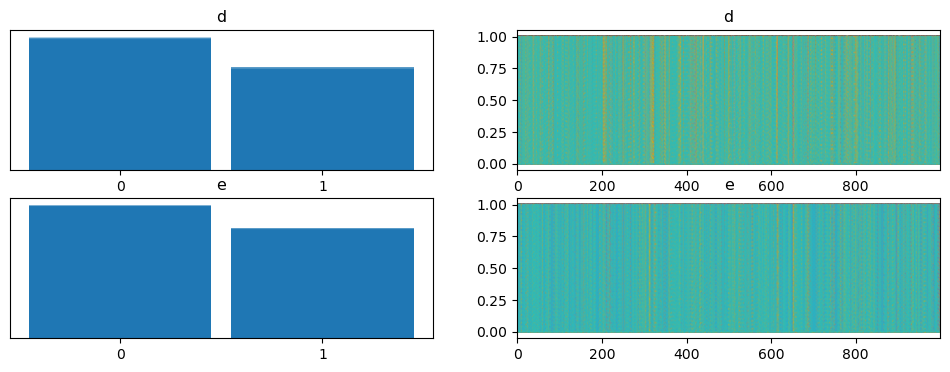

In [36]:
import arviz as az

az.plot_trace(traza)

Todo pelota, se ve ruido, como deberia ser

### 3.8. Graficar el posterior del desempe˜no de los tests. ¿Funciona el modelo? ¿Es capaz de recuperar el verdadero desempe˜no de los tests a pesar de no saber quienes est´an infectados y no saber a priori qu´e test tiene mejor desempe˜no que el resto?

Como hago el desempeno? 
que cosas tomo como dato?

### 3.9 Repetir el procedimiento agregando m´as test y graficar el posterior de los desempe˜nos.